### Using Pre-trained CNN network for audio classification 
#### Written by : Leo pauly | leopauly314@gmail.com

In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import pickle
import itertools
import numpy as np

import keras
from keras.models import model_from_json
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Using TensorFlow backend.


In [2]:
CLASSES = ["AC", "CH", "CP", "DB", "Dr", "EI", "GS", "Ja", "Si", "SM"]
np.random.seed(1337)  # for reproducibility

In [3]:
## Plotting confusion matrix
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
## Loading model
json_file = open("/nobackup/leopauly/S2LStage2/logdir_0/audio_classifier_mfcc_1.json", 'r')
#json_file = open("/nobackup/leopauly/S2LStage2/model.keras.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/nobackup/leopauly/S2LStage2/logdir_0/audio_classifier_mfcc_1.h5")
#loaded_model.load_weights("/nobackup/leopauly/S2LStage2/model.keras.h5")

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
loaded_model.compile(loss='sparse_categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
print('Pretrained audio classifier model loaded!')

Pretrained audio classifier model loaded!


In [5]:
## Getting data
print("Start loading data")

#fd = open("/nobackup/leopauly/UrabanSound8k_Stored_mfcc/data_x_librosa_train_1.pkl", 'rb')
#fd2 = open("/nobackup/leopauly/UrabanSound8k_Stored_mfcc/data_y_librosa_train_1.pkl", 'rb')

fd = open("/nobackup/leopauly/FreeSFx/mfcc/data_x_freesfxx_mfcc.pkl", 'rb')
fd2 = open("/nobackup/leopauly/FreeSFx/mfcc/data_y_freesfxx_mfcc.pkl", 'rb')

features = pickle.load(fd,encoding='bytes')
labels = pickle.load(fd2,encoding='bytes')

print("Data loaded")

p_train = 0.1

rnd_indices = np.random.rand(len(labels)) < p_train

X_train = features[rnd_indices]
Y_train = labels[rnd_indices]
X_test = features[~rnd_indices]
Y_test = labels[~rnd_indices]

Start loading data
Data loaded


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


## FIX FOR KERAS
# Y_train = Y_train.reshape((-1, 1))
Y_test = Y_test.reshape((-1, 1))

In [7]:
rnd_indices = np.random.rand(len(labels)) < p_train
print(rnd_indices)
print(Y_train)

[False False False ..., False False False]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 

6080/6402 [===========================>..] - ETA: 2sConfusion matrix, without normalization


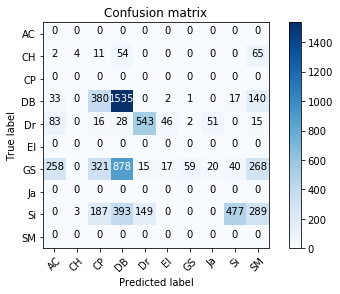

Got Predictions:  6402
Result:  2618  on  6402  ->  0.40893470790378006


In [8]:
## FIX FOR KERAS
# labels = labels.reshape((-1, 1))

## Prediction
predictions = loaded_model.predict_classes(X_test)

plot_confusion_matrix( cm=confusion_matrix(Y_test, predictions) , classes=CLASSES)

right = 0
total = 0

for idx in range(len(predictions)):
    if (predictions[idx] == Y_test[idx]):
        right += 1
    total += 1

## Decode and display prediction
print("Got Predictions: ", len(predictions))

print ("Result: ", str(right), " on ", str(total), " -> ", str( ( (right * 1.0) / total ) ))


In [9]:
accuracy_score(Y_test, predictions, normalize=True, sample_weight=None)

0.40893470790378006

In [10]:
print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.57      0.03      0.06       136
          2       0.00      0.00      0.00         0
          3       0.53      0.73      0.61      2108
          4       0.77      0.69      0.73       784
          5       0.00      0.00      0.00         0
          6       0.95      0.03      0.06      1876
          7       0.00      0.00      0.00         0
          8       0.89      0.32      0.47      1498
          9       0.00      0.00      0.00         0

avg / total       0.77      0.41      0.42      6402



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [11]:
print(labels.shape)

(7116,)


In [12]:
print(features.shape)

(7116, 40, 40, 3)
